In [1]:
pip freeze > model_requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, hinge_loss, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import RandomForestClassifier

In [3]:
data_train_df = pd.read_csv("data_train_csv")
data_test_df = pd.read_csv("data_test_csv")
data_val_df = pd.read_csv("data_val_csv")

In [4]:
dl_train_df = data_train_df[['Wickets taken', 'Remainder', 'Winner_num']]
dl_test_df = data_test_df[['Wickets taken', 'Remainder', 'Winner_num']]
dl_val_df = data_val_df[['Wickets taken', 'Remainder', 'Winner_num']]

In [5]:
data_mm_train_df = pd.read_csv('data_smin_mm_train_csv')
data_mm_test_df = pd.read_csv('data_mm_test_csv')
data_mm_val_df = pd.read_csv('data_mm_val_csv')

In [6]:
data_ss_train_df = pd.read_csv('data_smin_ss_train_csv')
data_ss_test_df = pd.read_csv('data_ss_test_csv')
data_ss_val_df = pd.read_csv('data_ss_val_csv')

In [7]:
data_log_train_df = pd.read_csv('data_smin_log_train_csv')
data_log_test_df = pd.read_csv('data_test_csv')
data_log_val_df = pd.read_csv('data_val_csv')

In [8]:
print(f"Data_train: {data_mm_train_df.shape}")
print(f"Data_test: {data_mm_test_df.shape}")
print(f"Data_val: {data_mm_val_df.shape}")

#Divide by 10 for the sample

Data_train: (296133, 9)
Data_test: (27782, 9)
Data_val: (55563, 9)


In [9]:
#own module which takes in df for train, test and val and returns in x and y format.  Can also sample.
from data_formatting import data_format

In [10]:
X_mm_train_sample, X_mm_test_sample, X_mm_val_sample, y_mm_train_sample, y_mm_test_sample, y_mm_val_sample = data_format(data_mm_train_df, data_mm_test_df, data_mm_val_df, 'sample', 20)
X_ss_train_sample, X_ss_test_sample, X_ss_val_sample, y_ss_train_sample, y_ss_test_sample, y_ss_val_sample = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, 'sample', 20)
X_log_train_sample, X_log_test_sample, X_log_val_sample, y_log_train_sample, y_log_test_sample, y_log_val_sample = data_format(data_log_train_df, data_log_test_df, data_log_val_df, 'sample', 20)

In [11]:
X_ss_train, X_ss_test, X_ss_val, y_ss_train, y_ss_test, y_ss_val = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, None, None)
X_mm_train, X_mm_test, X_mm_val, y_mm_train, y_mm_test, y_mm_val = data_format(data_mm_train_df, data_mm_test_df, data_mm_val_df, None, None)
X_log_train, X_log_test, X_log_val, y_log_train, y_log_test, y_log_val = data_format(data_log_train_df, data_log_test_df, data_log_val_df, None, None)

In [12]:
X_dl_train, X_dl_test, X_dl_val, y_dl_train, y_dl_test, y_dl_val = data_format(dl_train_df, dl_test_df, dl_val_df, None, None)

SVM model

In [13]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

Feature selection

Used Pearson correlation to show where the highly correlated areas were, and removed anything above 0.8

<Axes: >

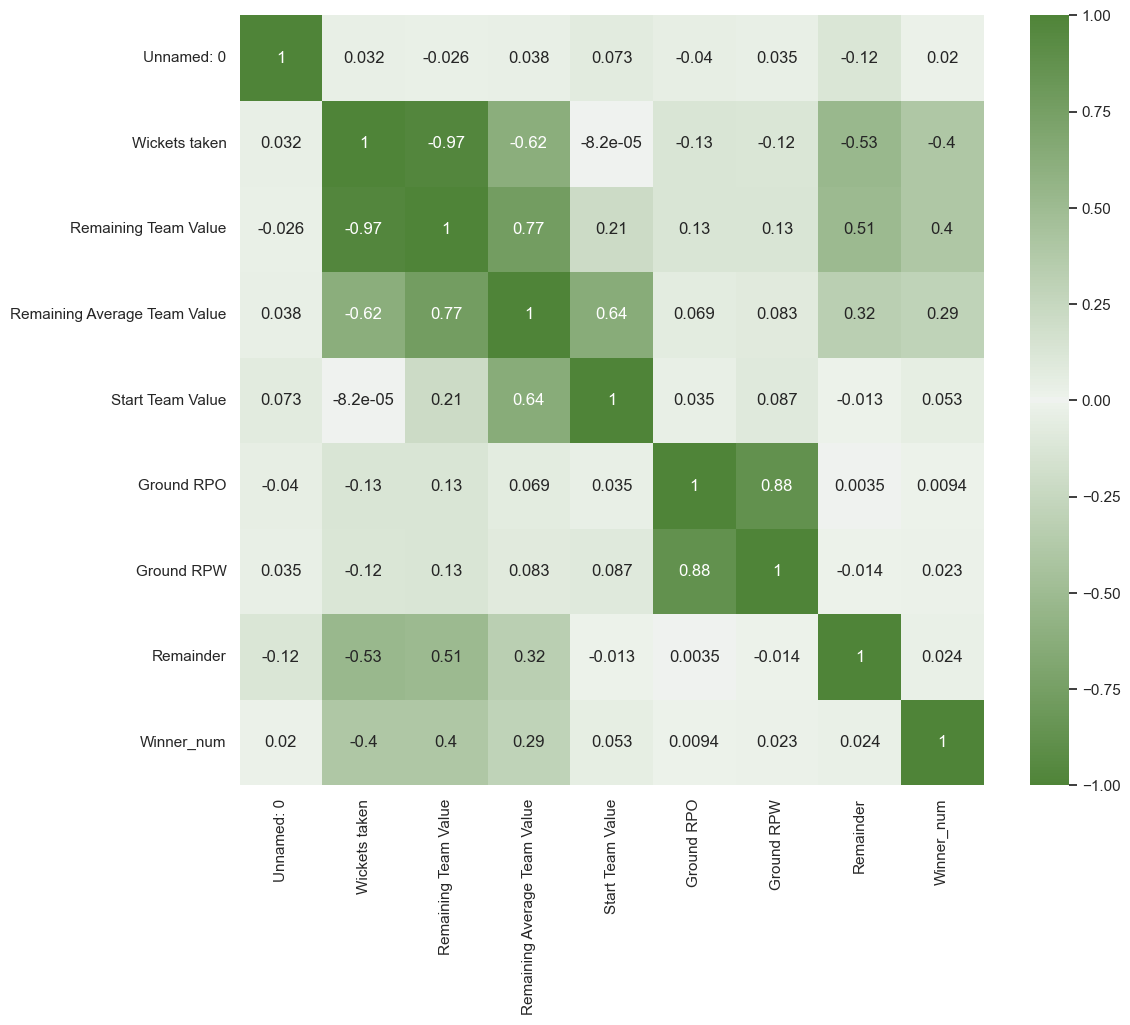

In [ ]:
corr_matrix = data_ss_train_df.corr(method = 'pearson')
sns.set(rc={'figure.figsize':(12,10)})
new_cmap = sns.diverging_palette(120, 120, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=new_cmap, vmin=-1, vmax=1)

In [17]:
model = RandomForestClassifier(n_jobs=-1, random_state=7)
model.fit(X_ss_train, y_ss_train)

RandomForestClassifier(n_jobs=-1, random_state=7)

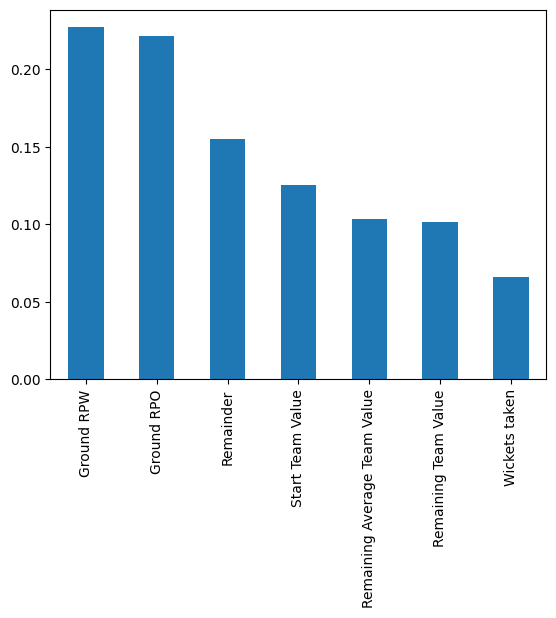

In [19]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(model.feature_importances_, index=X_ss_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [ ]:
# Feature selection Correlation
data_ss_corr_train_df = data_ss_train_df.drop(columns=['Remaining Team Value', 'Ground RPO'])
data_ss_corr_test_df = data_ss_test_df.drop(columns=['Remaining Team Value', 'Ground RPO'])
data_ss_corr_val_df = data_ss_val_df.drop(columns=['Remaining Team Value', 'Ground RPO'])

X_ss_corr_train, X_ss_corr_test, X_ss_corr_val, y_ss_corr_train, y_ss_corr_test, y_ss_corr_val = data_format(data_ss_corr_train_df, data_ss_corr_test_df, data_ss_corr_val_df, None, None)
X_ss_corr_train_sample, X_ss_corr_test_sample, X_ss_corr_val_sample, y_ss_corr_train_sample, y_ss_corr_test_sample, y_ss_corr_val_sample = data_format(data_ss_corr_train_df, data_ss_corr_test_df, data_ss_corr_val_df, 'sample',20)

In [20]:
#Feature selection RF with domain knowledge
data_ss_rf_train_df = data_ss_train_df.drop(columns=['Remaining Team Value', 'Ground RPO'])
data_ss_rf_test_df = data_ss_test_df.drop(columns=['Remaining Team Value', 'Ground RPO'])
data_ss_rf_val_df = data_ss_val_df.drop(columns=['Remaining Team Value', 'Ground RPO'])

X_ss_rf_train, X_ss_rf_test, X_ss_rf_val, y_ss_rf_train, y_ss_rf_test, y_ss_rf_val = data_format(data_ss_rf_train_df, data_ss_rf_test_df, data_ss_rf_val_df, None, None)
X_ss_rf_train_sample, X_ss_rf_test_sample, X_ss_rf_val_sample, y_ss_rf_train_sample, y_ss_rf_test_sample, y_ss_rf_val_sample = data_format(data_ss_rf_train_df, data_ss_rf_test_df, data_ss_rf_val_df, 'sample',20)

In [22]:
#Feature selection RF without domain knowledge
data_ss_rfl_train_df = data_ss_train_df.drop(columns=['Remaining Average Team Value', 'Wickets taken'])
data_ss_rfl_test_df = data_ss_test_df.drop(columns=['Remaining Average Team Value', 'Wickets taken'])
data_ss_rfl_val_df = data_ss_val_df.drop(columns=['Remaining Average Team Value', 'Wickets taken'])

X_ss_rfl_train, X_ss_rfl_test, X_ss_rfl_val, y_ss_rfl_train, y_ss_rfl_test, y_ss_rfl_val = data_format(data_ss_rfl_train_df, data_ss_rfl_test_df, data_ss_rfl_val_df, None, None)
X_ss_rfl_train_sample, X_ss_rfl_test_sample, X_ss_rfl_val_sample, y_ss_rfl_train_sample, y_ss_rf_test_sample, y_ss_rfl_val_sample = data_format(data_ss_rfl_train_df, data_ss_rfl_test_df, data_ss_rfl_val_df, 'sample',20)

Baseline one SVC

In [23]:
labels = ['Team 1', 'Tie', 'Team 2']

Training score: 0.7264487722611299, Testing score: 0.7279173565618026, Time to train: 4338.585690021515 seconds


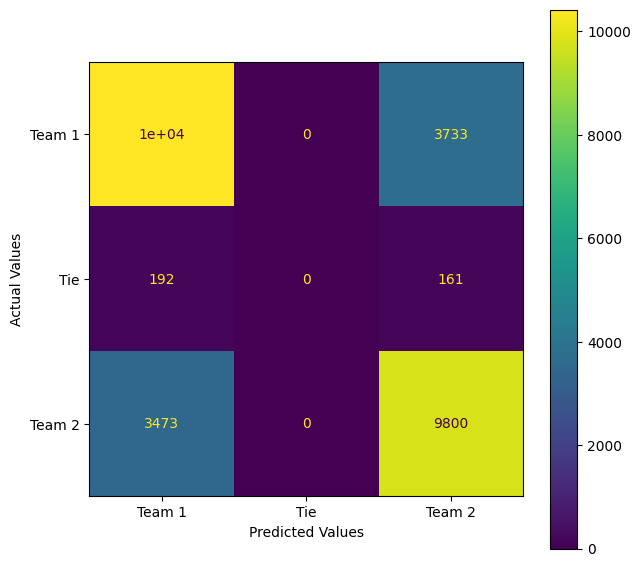

              precision    recall  f1-score   support

      Team 1       0.74      0.74      0.74     14156
         Tie       0.00      0.00      0.00       353
      Team 2       0.72      0.74      0.73     13273

    accuracy                           0.73     27782
   macro avg       0.49      0.49      0.49     27782
weighted avg       0.72      0.73      0.72     27782



C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469

In [ ]:
##DL data

start_time = time.time()

model = SVC(kernel="linear", random_state=7)
model.fit(X_dl_train, y_dl_train)

model_train_score = model.score(X_dl_train, y_dl_train)
model_test_score = model.score(X_dl_test, y_dl_test)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Training score: {model_train_score}, Testing score: {model_test_score}, Time to train: {elapsed_time} seconds" )

y_pred = model.predict(X_dl_test)

cm = confusion_matrix(y_dl_test, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(7,7))
cmd.plot(ax=ax)
plt.grid(False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_dl_test, y_pred, target_names=labels))

Training score: 0.5369614328696903, Testing score: 0.6011086314880139, Time to train: 5439.3267731666565 seconds


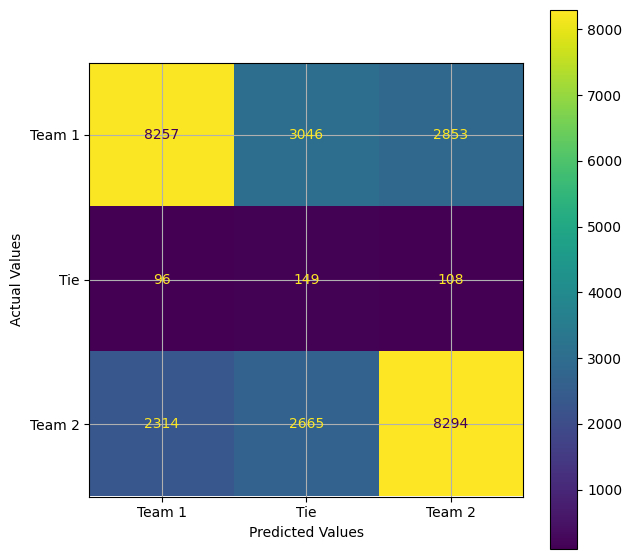

              precision    recall  f1-score   support

      Team 1       0.77      0.58      0.67     14156
         Tie       0.03      0.42      0.05       353
      Team 2       0.74      0.62      0.68     13273

    accuracy                           0.60     27782
   macro avg       0.51      0.54      0.46     27782
weighted avg       0.75      0.60      0.66     27782



In [ ]:
##SS and SMOTE data

start_time = time.time()

model = SVC(kernel="linear", random_state=7)
model.fit(X_ss_train, y_ss_train)

model_train_score = model.score(X_ss_train, y_ss_train)
model_test_score = model.score(X_ss_test, y_ss_test)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Training score: {model_train_score}, Testing score: {model_test_score}, Time to train: {elapsed_time} seconds" )

y_pred = model.predict(X_ss_test)

cm = confusion_matrix(y_ss_test, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(7,7))
cmd.plot(ax=ax)
plt.grid(False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_ss_test, y_pred, target_names=labels))

Training score: 0.5391969148997241, Testing score: 0.6042761500251962, Time to train: 11449.374498128891 seconds


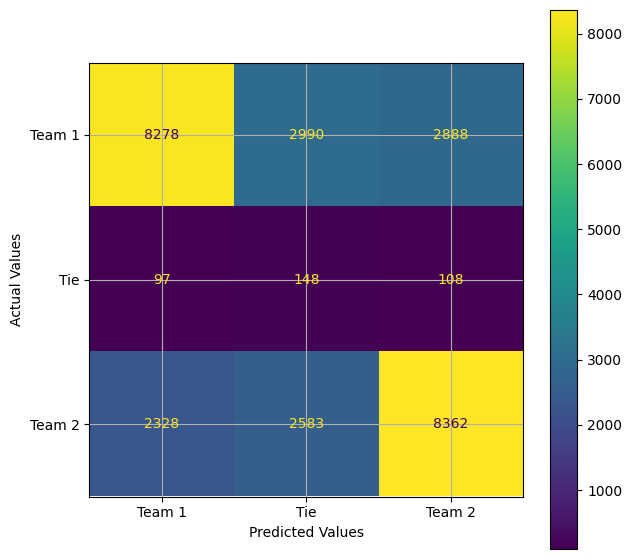

              precision    recall  f1-score   support

      Team 1       0.77      0.58      0.67     14156
         Tie       0.03      0.42      0.05       353
      Team 2       0.74      0.63      0.68     13273

    accuracy                           0.60     27782
   macro avg       0.51      0.54      0.46     27782
weighted avg       0.75      0.60      0.66     27782



In [ ]:
##MM and SMOTE data
model = SVC(kernel="linear", random_state=7)
model.fit(X_mm_train, y_mm_train)

model_train_score = model.score(X_mm_train, y_mm_train)
model_test_score = model.score(X_mm_test, y_mm_test)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Training score: {model_train_score}, Testing score: {model_test_score}, Time to train: {elapsed_time} seconds" )

y_pred = model.predict(X_mm_test)

cm = confusion_matrix(y_mm_test, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(7,7))
cmd.plot(ax=ax)
plt.grid(False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_mm_test, y_pred, target_names=labels))

Seems to have slight underfitting, and data unlikely to be linearly separable

Hyperparameter tuning

In [25]:
k_list = ['rbf', 'sigmoid']
#Not poly because it takes so long and not linear as relationship isn't linear (see SVM above)
gamma_list = [0.001, 0.01, 0.1, 1, 10, 100, 250, 500, 750]
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 400, 500]

In [ ]:
print("MM")
best_accuracy = 0
best_loss = 100

for k in k_list:
    for gamma in gamma_list:
        for c in c_list:

            start_time = time.time()
            
            # for each combination of parameters, train an SVC
            model = SVC(kernel=k, gamma=gamma, C=c, random_state=7)
            model.fit(X_mm_train_sample, y_mm_train_sample)
            y_train_pred = model.predict(X_mm_train_sample)
            y_val_pred = model.predict(X_mm_val_sample)

            train_accuracy = accuracy_score(y_mm_train_sample, y_train_pred)
            val_accuracy = accuracy_score(y_mm_val_sample, y_val_pred)

            train_loss = hinge_loss(y_mm_train_sample, model.decision_function(X_mm_train_sample))
            val_loss = hinge_loss(y_mm_val_sample, model.decision_function(X_mm_val_sample))

            end_time = time.time()
            elapsed_time = end_time - start_time

            print(f"{k}, Gamma: {gamma}, C: {c}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Train Loss: {train_loss}, Validation Loss: {val_loss}, Time to train: {elapsed_time} seconds")


            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_acc_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

            if val_loss < best_loss:
                best_loss = val_loss
                best_loss_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

print(f"Best accuracy is: {best_accuracy} and best parameters are {best_acc_parameters}")
print(f"Best loss is: {best_loss} and best parameters are {best_loss_parameters}")

MM
rbf, Gamma: 0.001, C: 0.001, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8576226335393367, Validation Loss: 2.791359803504446, Time to train: 50.753623723983765 seconds
rbf, Gamma: 0.001, C: 0.01, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8571445789832777, Validation Loss: 2.7906726867587723, Time to train: 50.8405704498291 seconds
rbf, Gamma: 0.001, C: 0.1, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8510578632129342, Validation Loss: 2.7817836178691553, Time to train: 48.626461029052734 seconds
rbf, Gamma: 0.001, C: 1, Train Accuracy: 0.5135080372821829, Validation Accuracy: 0.5637149028077754, Train Loss: 1.2537296194095442, Validation Loss: 1.2348191809569784, Time to train: 48.09118628501892 seconds
rbf, Gamma: 0.001, C: 10, Train Accuracy: 0.5340402539511009, Validation Accuracy: 0.5971922246220303, Train Loss: 1.19727511912489

In [ ]:
print("SS")
best_accuracy = 0
best_loss = 100

for k in k_list:
    for gamma in gamma_list:
        for c in c_list:

            start_time = time.time()
            
            # for each combination of parameters, train an SVC
            model = SVC(kernel=k, gamma=gamma, C=c, random_state=7)
            model.fit(X_ss_train_sample, y_ss_train_sample)
            y_train_pred = model.predict(X_ss_train_sample)
            y_val_pred = model.predict(X_ss_val_sample)

            train_accuracy = accuracy_score(y_ss_train_sample, y_train_pred)
            val_accuracy = accuracy_score(y_ss_val_sample, y_val_pred)

            train_loss = hinge_loss(y_ss_train_sample, model.decision_function(X_ss_train_sample))
            val_loss = hinge_loss(y_ss_val_sample, model.decision_function(X_ss_val_sample))

            end_time = time.time()
            elapsed_time = end_time - start_time

            print(f"{k}, Gamma: {gamma}, C: {c}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Train Loss: {train_loss}, Validation Loss: {val_loss}, Time to train: {elapsed_time} seconds")
            
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_acc_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

            if val_loss < best_loss:
                best_loss = val_loss
                best_loss_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

print(f"Best accuracy is: {best_accuracy} and best parameters are {best_acc_parameters}")
print(f"Best loss is: {best_loss} and best parameters are {best_loss_parameters}")

SS
rbf, Gamma: 0.001, C: 0.001, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8567259968907486, Validation Loss: 2.7900798351914773, Time to train: 54.668997287750244 seconds
rbf, Gamma: 0.001, C: 0.01, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8393406770820142, Validation Loss: 2.7643840962963013, Time to train: 52.72057366371155 seconds
rbf, Gamma: 0.001, C: 0.1, Train Accuracy: 0.5065513980818587, Validation Accuracy: 0.6227501799856011, Train Loss: 1.259814439886818, Validation Loss: 1.103762281245536, Time to train: 49.92802548408508 seconds
rbf, Gamma: 0.001, C: 1, Train Accuracy: 0.548966635147913, Validation Accuracy: 0.6184305255579554, Train Loss: 1.17469213580186, Validation Loss: 1.0736575031281195, Time to train: 47.11631393432617 seconds
rbf, Gamma: 0.001, C: 10, Train Accuracy: 0.5651087397001215, Validation Accuracy: 0.6123110151187905, Train Loss: 1.119454049607681, Vali

In [ ]:
print("SS with Feature Selection Pearson's Correlation")
best_accuracy = 0
best_loss = 100

for k in k_list:
    for gamma in gamma_list:
        for c in c_list:

            start_time = time.time()
            
            # for each combination of parameters, train an SVC
            model = SVC(kernel=k, gamma=gamma, C=c, random_state=7)
            model.fit(X_ss_corr_train_sample, y_ss_corr_train_sample)
            y_train_pred = model.predict(X_ss_corr_train_sample)
            y_val_pred = model.predict(X_ss_corr_val_sample)

            train_accuracy = accuracy_score(y_ss_corr_train_sample, y_train_pred)
            val_accuracy = accuracy_score(y_ss_corr_val_sample, y_val_pred)

            train_loss = hinge_loss(y_ss_corr_train_sample, model.decision_function(X_ss_corr_train_sample))
            val_loss = hinge_loss(y_ss_corr_val_sample, model.decision_function(X_ss_corr_val_sample))

            end_time = time.time()
            elapsed_time = end_time - start_time

            print(f"{k}, Gamma: {gamma}, C: {c}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Train Loss: {train_loss}, Validation Loss: {val_loss}, Time to train: {elapsed_time} seconds")

            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_acc_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

            if val_loss < best_loss:
                best_loss = val_loss
                best_loss_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

print(f"Best accuracy is: {best_accuracy} and best parameters are {best_acc_parameters}")
print(f"Best loss is: {best_loss} and best parameters are {best_loss_parameters}")

SS with Feature Selection Pearson's Correlation
rbf, Gamma: 0.001, C: 0.001, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8568354700187013, Validation Loss: 2.7902013250265707, Time to train: 52.39489197731018 seconds
rbf, Gamma: 0.001, C: 0.01, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8461696202771654, Validation Loss: 2.7743440659727137, Time to train: 51.91655254364014 seconds
rbf, Gamma: 0.001, C: 0.1, Train Accuracy: 0.4958800486289342, Validation Accuracy: 0.5914326853851691, Train Loss: 1.2987045721287334, Validation Loss: 1.1673487103255822, Time to train: 51.08438277244568 seconds
rbf, Gamma: 0.001, C: 1, Train Accuracy: 0.5361339997298392, Validation Accuracy: 0.6108711303095752, Train Loss: 1.20864892166133, Validation Loss: 1.0989270298237512, Time to train: 47.38788390159607 seconds
rbf, Gamma: 0.001, C: 10, Train Accuracy: 0.5464001080642983, Validation Accuracy: 0.622390

In [26]:
#Feature selected rf with Domain Knowledge
print("SS With Feature Selection RF")
best_accuracy = 0
best_loss = 100

for k in k_list:
    for gamma in gamma_list:
        for c in c_list:

            start_time = time.time()
            
            # for each combination of parameters, train an SVC
            model = SVC(kernel=k, gamma=gamma, C=c, random_state=7)
            model.fit(X_ss_rf_train_sample, y_ss_rf_train_sample)
            y_train_pred = model.predict(X_ss_rf_train_sample)
            y_val_pred = model.predict(X_ss_rf_val_sample)

            train_accuracy = accuracy_score(y_ss_rf_train_sample, y_train_pred)
            val_accuracy = accuracy_score(y_ss_rf_val_sample, y_val_pred)

            train_loss = hinge_loss(y_ss_rf_train_sample, model.decision_function(X_ss_rf_train_sample))
            val_loss = hinge_loss(y_ss_rf_val_sample, model.decision_function(X_ss_rf_val_sample))

            end_time = time.time()
            elapsed_time = end_time - start_time

            print(f"{k}, Gamma: {gamma}, C: {c}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Train Loss: {train_loss}, Validation Loss: {val_loss}, Time to train: {elapsed_time} seconds")


            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_acc_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

            if val_loss < best_loss:
                best_loss = val_loss
                best_loss_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

print(f"Best accuracy is: {best_accuracy} and best parameters are {best_acc_parameters}")
print(f"Best loss is: {best_loss} and best parameters are {best_loss_parameters}")

SS With Feature Selection RF
rbf, Gamma: 0.001, C: 0.001, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8568354700187013, Validation Loss: 2.7902013250265707, Time to train: 85.24362230300903 seconds
rbf, Gamma: 0.001, C: 0.01, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8461696202771654, Validation Loss: 2.7743440659727137, Time to train: 69.96455001831055 seconds
rbf, Gamma: 0.001, C: 0.1, Train Accuracy: 0.4958800486289342, Validation Accuracy: 0.5914326853851691, Train Loss: 1.2987045721287334, Validation Loss: 1.1673487103255822, Time to train: 69.20917320251465 seconds
rbf, Gamma: 0.001, C: 1, Train Accuracy: 0.5361339997298392, Validation Accuracy: 0.6108711303095752, Train Loss: 1.20864892166133, Validation Loss: 1.0989270298237512, Time to train: 64.18248009681702 seconds
rbf, Gamma: 0.001, C: 10, Train Accuracy: 0.5464001080642983, Validation Accuracy: 0.6223902087832973, Train L

In [ ]:
#Feature selected rf removing least important 2 features
print("SS With Feature Selection RF without domain knowledge")
best_accuracy = 0
best_loss = 100

for k in k_list:
    for gamma in gamma_list:
        for c in c_list:

            start_time = time.time()
            
            # for each combination of parameters, train an SVC
            model = SVC(kernel=k, gamma=gamma, C=c, random_state=7)
            model.fit(X_ss_rfl_train_sample, y_ss_rfl_train_sample)
            y_train_pred = model.predict(X_ss_rfl_train_sample)
            y_val_pred = model.predict(X_ss_rfl_val_sample)

            train_accuracy = accuracy_score(y_ss_rfl_train_sample, y_train_pred)
            val_accuracy = accuracy_score(y_ss_rfl_val_sample, y_val_pred)

            train_loss = hinge_loss(y_ss_rfl_train_sample, model.decision_function(X_ss_rfl_train_sample))
            val_loss = hinge_loss(y_ss_rfl_val_sample, model.decision_function(X_ss_rfl_val_sample))

            end_time = time.time()
            elapsed_time = end_time - start_time

            print(f"{k}, Gamma: {gamma}, C: {c}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Train Loss: {train_loss}, Validation Loss: {val_loss}, Time to train: {elapsed_time} seconds")


            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_acc_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

            if val_loss < best_loss:
                best_loss = val_loss
                best_loss_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

print(f"Best accuracy is: {best_accuracy} and best parameters are {best_acc_parameters}")
print(f"Best loss is: {best_loss} and best parameters are {best_loss_parameters}")

TUNING HYPERPARAMETERS FURTHER

Use the best combination for ss data
Best parameters for SS non feature selection: {'C': 200, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4,2.5, 2.6, 2.7, 2.8]

In [ ]:
best_accuracy=0
best_loss = 100
c_list= []
g_list=[]
train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []

for c in range(100, 301, 10):
    for g in gammas:
        c_list.append(c)
        g_list.append(g)

        start_time = time.time()
            
        # for each combination of parameters, train an SVC
        model = SVC(kernel='rbf', gamma=g, C=c, random_state=7)
        model.fit(X_ss_train_sample, y_ss_train_sample)

        y_train_pred = model.predict(X_ss_train_sample)
        y_val_pred = model.predict(X_ss_val_sample)

        train_accuracy = accuracy_score(y_ss_train_sample, y_train_pred)
        val_accuracy = accuracy_score(y_ss_val_sample, y_val_pred)

        train_loss = hinge_loss(y_ss_train_sample, model.decision_function(X_ss_train_sample))
        val_loss = hinge_loss(y_ss_val_sample, model.decision_function(X_ss_val_sample))

        end_time = time.time()
        elapsed_time = end_time - start_time
        
        print(f"{c} C, {g} Gamma, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Train Loss: {train_loss}, Validation Loss: {val_loss}, Time taken to train: {elapsed_time}")

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_acc_c = c
            best_acc_g = g

        if val_loss< best_loss:
            best_loss = val_loss
            best_loss_c = c
            best_loss_g = g

print(f"Best accuracy is: {best_accuracy}, C is {best_acc_c} and Gamma is {best_acc_g}")
print(f"Best accuracy is: {best_loss}, C is {best_loss_c} and Gamma is {best_loss_g}")

100 C, 0.1 Gamma, Train Accuracy: 0.8148048088612725, Validation Accuracy: 0.701223902087833, Train Loss: 0.41679371781955465, Validation Loss: 0.6728230122638119, Time taken to train: 67.42816472053528
100 C, 0.2 Gamma, Train Accuracy: 0.8567472646224503, Validation Accuracy: 0.7458603311735061, Train Loss: 0.3093539053134671, Validation Loss: 0.5548912222711007, Time taken to train: 49.63066101074219
100 C, 0.3 Gamma, Train Accuracy: 0.8819397541537215, Validation Accuracy: 0.7854571634269258, Train Loss: 0.2496840778540165, Validation Loss: 0.4628856862310116, Time taken to train: 23.618839263916016
100 C, 0.4 Gamma, Train Accuracy: 0.9001756044846684, Validation Accuracy: 0.793016558675306, Train Loss: 0.20980623720513997, Validation Loss: 0.4410678866089287, Time taken to train: 22.627577781677246
100 C, 0.5 Gamma, Train Accuracy: 0.9151019856814805, Validation Accuracy: 0.8063354931605472, Train Loss: 0.17766768425170787, Validation Loss: 0.4123477433679033, Time taken to train: 

ValueError: All arrays must be of the same length

Train Accuracy: 0.9576474084279699, Val Accuracy: 0.931375195723773, Test Accuracy: 0.9275790079907854


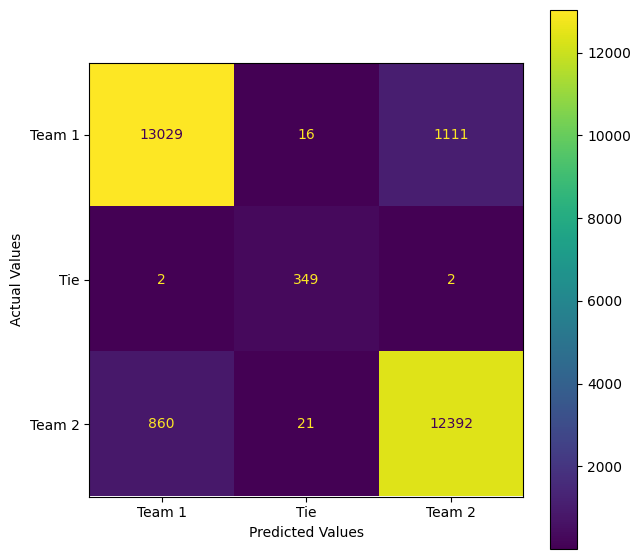

              precision    recall  f1-score   support

      Team 1       0.94      0.92      0.93     14156
         Tie       0.90      0.99      0.94       353
      Team 2       0.92      0.93      0.93     13273

    accuracy                           0.93     27782
   macro avg       0.92      0.95      0.93     27782
weighted avg       0.93      0.93      0.93     27782



In [ ]:
final_model= SVC(kernel="rbf", random_state=7, C=200, gamma=1.6)
final_model.fit(X_ss_train, y_ss_train)

y_train_pred = final_model.predict(X_ss_train)
y_val_pred = final_model.predict(X_ss_val)
y_test_pred = final_model.predict(X_ss_test)

# Model Accuracy: how often is the classifier correct?
print(f"Train Accuracy: {accuracy_score(y_ss_train, y_train_pred)}, Val Accuracy: {accuracy_score(y_ss_val, y_val_pred)}, Test Accuracy: {accuracy_score(y_ss_test, y_test_pred)}")

cm = confusion_matrix(y_ss_test, y_test_pred, labels=final_model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(7,7))
cmd.plot(ax=ax)
plt.grid(False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
ax.set_title('Confusion Matrix SVM')
plt.show()

print(classification_report(y_ss_test, y_test_pred, target_names=labels))

In [ ]:
y_test_pred_list  = []
for y in y_test_pred:
    if y==0:
        y_test_pred_list.append("Team 1")
    elif y == 2:
        y_test_pred_list.append("Team 2")
    elif y==1:
        y_test_pred_list.append("Tie")

y_test_pred_df = pd.DataFrame(y_test_pred_list, columns=["Winner Bat First"])

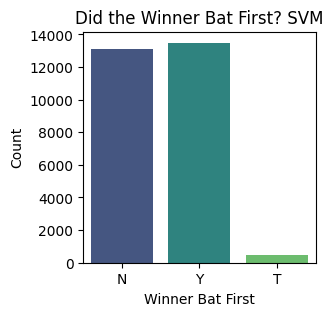

In [ ]:
plt.figure(figsize=(3, 3))
sns.countplot(x='Winner Bat First', data=y_test_pred_df, palette='viridis')

# Adding labels and title
plt.ylabel('Count')
plt.title('Distribution of classes - SVM')
plt.show()

In [ ]:
sdfsdf

N: 1, Train Accuracy 0.9341063741147063, Validation Accuracy: 0.7657290895632864
N: 101, Train Accuracy 0.9916678239133454, Validation Accuracy: 0.8082901554404145
N: 201, Train Accuracy 0.9915289543119011, Validation Accuracy: 0.8090303478904515
N: 301, Train Accuracy 0.9919455631162338, Validation Accuracy: 0.8112509252405625
N: 401, Train Accuracy 0.992014997916956, Validation Accuracy: 0.8119911176905995
N: 501, Train Accuracy 0.9919455631162338, Validation Accuracy: 0.8123612139156181
N: 601, Train Accuracy 0.9918761283155118, Validation Accuracy: 0.8131014063656551
N: 701, Train Accuracy 0.9918761283155118, Validation Accuracy: 0.8134715025906736
N: 801, Train Accuracy 0.9919455631162338, Validation Accuracy: 0.8138415988156921
N: 901, Train Accuracy 0.9919455631162338, Validation Accuracy: 0.8134715025906736
N: 1001, Train Accuracy 0.992014997916956, Validation Accuracy: 0.8138415988156921
Best score: 0.81
Best Gamma: {best_g}
Best accuracy is: 0.8138415988156921 and estimators 

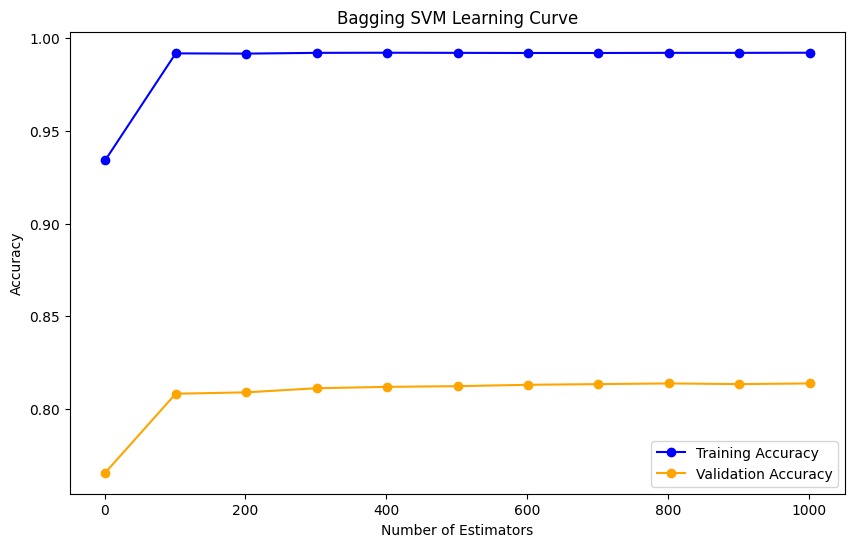

In [ ]:
from sklearn.ensemble import BaggingClassifier

best_accuracy=0
n_list= []
train_acc_list = []
val_acc_list = []

model = SVC(kernel='rbf', gamma=g, C=130, random_state = 7)
model.fit(X_ss_train_sample, y_ss_train_sample)

for n in range(1, 1002, 100):
    n_list.append(n)
    bagging_model = BaggingClassifier(estimator=model, n_estimators=n, random_state=7)
    bagging_model.fit(X_ss_train_sample, y_ss_train_sample)


    y_train_pred = bagging_model.predict(X_ss_train_sample)
    y_val_pred= bagging_model.predict(X_ss_val_sample)
    train_accuracy = accuracy_score(y_ss_train_sample, y_train_pred)
    val_accuracy = accuracy_score(y_ss_val_sample, y_val_pred)

    train_acc_list.append(train_accuracy)
    val_acc_list.append(val_accuracy)

    print(f"N: {n}, Train Accuracy {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_n = n

print("Best score: {:.2f}".format(best_accuracy))
print("Best Gamma: {best_g}")
    
n_df = pd.DataFrame({'Num Estimators': n_list, 'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})
print(f"Best accuracy is: {best_accuracy} and estimators is {best_n}")

plt.figure(figsize=(10, 6))
plt.title('Bagging SVM Learning Curve')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.plot(n_df['Num Estimators'], n_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(n_df['Num Estimators'], n_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.ylim(0.7, 1)
plt.legend()
plt.show()

In [ ]:
n_df

,Num Estimators,Train Accuracy,Validation Accuracy
0,1,0.934106,0.765729
1,101,0.991668,0.808290
2,201,0.991529,0.809030
3,301,0.991946,0.811251
4,401,0.992015,0.811991
5,501,0.991946,0.812361
6,601,0.991876,0.813101
7,701,0.991876,0.813472
8,801,0.991946,0.813842
9,901,0.991946,0.813472


https://datascience.stackexchange.com/questions/66216/gridsearch-without-cv